#Rendered Handpose Dataset
https://lmb.informatik.uni-freiburg.de/data/RenderedHandpose/RHD_v1-1.zip


Get dataset

In [ ]:
%cd /content/

/content


In [ ]:
!wget https://lmb.informatik.uni-freiburg.de/data/RenderedHandpose/RHD_v1-1.zip

--2024-04-14 13:31:34--  https://lmb.informatik.uni-freiburg.de/data/RenderedHandpose/RHD_v1-1.zip
Resolving lmb.informatik.uni-freiburg.de (lmb.informatik.uni-freiburg.de)... 132.230.167.23
Connecting to lmb.informatik.uni-freiburg.de (lmb.informatik.uni-freiburg.de)|132.230.167.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7080690299 (6.6G) [application/zip]
Saving to: ‘RHD_v1-1.zip’

RHD_v1-1.zip        100%[===================>]   6.59G  18.2MB/s    in 6m 43s  

2024-04-14 13:38:18 (16.8 MB/s) - ‘RHD_v1-1.zip’ saved [7080690299/7080690299]



Unzip datasets

In [ ]:
!unzip RHD_v1-1.zip

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

img_path = "/content/RHD_published_v2/evaluation/color/"
#depth_path = "/content/RHD_published_v2/evaluation/color/"
#mask_path = "/content/RHD_published_v2/evaluation/color/"
img_list = os.listdir(img_path)
img_list.sort()

df = pd.read_pickle('/content/RHD_published_v2/evaluation/anno_evaluation.pickle')

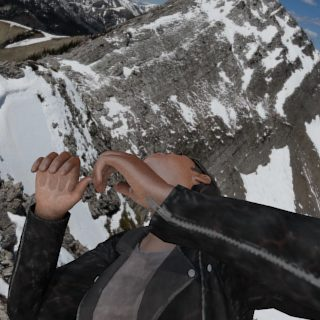

In [ ]:

image_num = 150 # @param {type: "slider", min: 100, max: 200}
VISIBLE_KP = True

img = Image.open(img_path + img_list[image_num])
#img_depth = Image.open(depth_path + img_list[image_num])
#img_mask = Image.open(mask_path + img_list[image_num])

img

In [ ]:
def render_kp_2d(img,lines,ax, VISIBLE_KP):
  ax.imshow(img)
  line = 0
  zero_point = 0
  i = 1

  while i < len(kp_coord_uv):
    if i == 21:
      i = 22
      zero_point = 21
    if (kp_visible[i] and kp_visible[i+1]) or not VISIBLE_KP:
      ax.plot([kp_coord_uv[i][0],
                kp_coord_uv[i+1][0]],
               [kp_coord_uv[i][1],
                 kp_coord_uv[i+1][1]],
               lines[line])
    if (kp_visible[i+1] and kp_visible[i+2]) or not VISIBLE_KP:
      ax.plot([kp_coord_uv[i+1][0],
                kp_coord_uv[i+2][0]],
               [kp_coord_uv[i+1][1],
                 kp_coord_uv[i+2][1]],
               lines[line])
    if (kp_visible[i+2] and kp_visible[i+3]) or not VISIBLE_KP:
      ax.plot([kp_coord_uv[i+2][0],
                kp_coord_uv[i+3][0]],
               [kp_coord_uv[i+2][1],
                 kp_coord_uv[i+3][1]],
               lines[line])
    if (kp_visible[i+3] and kp_visible[zero_point]) or not VISIBLE_KP:
      ax.plot([kp_coord_uv[i+3][0],
                kp_coord_uv[zero_point][0]],
               [kp_coord_uv[i+3][1],
                 kp_coord_uv[zero_point][1]],
               lines[line])
    line+=1
    if line == 5:
      line = 0
    i += 4

In [ ]:
def render_kp_3d(img, lines, ax, VISIBLE_KP):
  kp_visible = (df[image_num]['uv_vis'][:, 2] == 1)

  line = 0
  zero_point = 0
  i = 1

  while i < len(kp_coord_xyz):
    if i == 21:
      i = 22
      zero_point = 21
    if (kp_visible[i] and kp_visible[i+1]) or not VISIBLE_KP:
      ax.plot([kp_coord_xyz[i][0],
                kp_coord_xyz[i+1][0]],
               [kp_coord_xyz[i][1],
                 kp_coord_xyz[i+1][1]],
               lines[line])
    if (kp_visible[i+1] and kp_visible[i+2]) or not VISIBLE_KP:
      ax.plot([kp_coord_xyz[i+1][0],
                kp_coord_xyz[i+2][0]],
               [kp_coord_xyz[i+1][1],
                 kp_coord_xyz[i+2][1]],
               lines[line])
    if (kp_visible[i+2] and kp_visible[i+3]) or not VISIBLE_KP:
      ax.plot([kp_coord_xyz[i+2][0],
                kp_coord_xyz[i+3][0]],
               [kp_coord_xyz[i+2][1],
                 kp_coord_xyz[i+3][1]],
               lines[line])
    if (kp_visible[i+3] and kp_visible[zero_point]) or not VISIBLE_KP:
      ax.plot([kp_coord_xyz[i+3][0],
                kp_coord_xyz[zero_point][0]],
               [kp_coord_xyz[i+3][1],
                 kp_coord_xyz[zero_point][1]],
               lines[line])
    line+=1
    if line == 5:
      line = 0
    i += 4
  ax.view_init(azim=-120.0, elev=-120.0, )

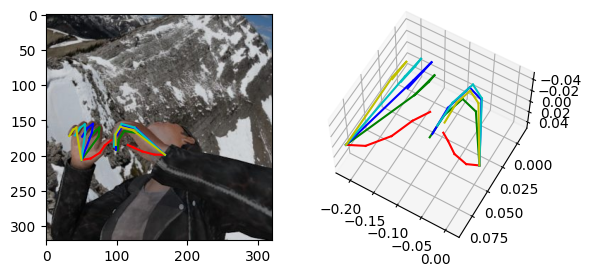

In [ ]:
lines = ['r-','g-','b-','c-','y-']

kp_coord_uv = df[image_num]['uv_vis'][:, :2]

kp_coord_xyz = df[image_num]['xyz']

if VISIBLE_KP:
  kp_visible = (df[image_num]['uv_vis'][:, 2] == 1)

fig = plt.figure()

ax = fig.add_subplot(1, 2, 1)
render_kp_2d(img, lines, ax,VISIBLE_KP)

ax = fig.add_subplot(1, 2, 2, projection='3d')
render_kp_3d(img, lines, ax,VISIBLE_KP)

plt.show()

# MediaPipe

## Install

In [ ]:
!pip install mediapipe

## Import

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import mediapipe as mp
import math

## Image

In [17]:
IMG = cv2.imread('/content/RHD_published_v2/evaluation/color/00003.png')

In [18]:
imgRGB = cv2.cvtColor(IMG, cv2.COLOR_BGR2RGB)

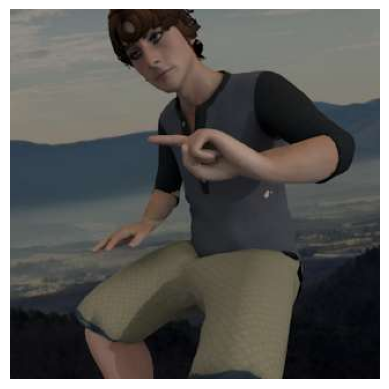

In [19]:
plt.axis('off')
plt.imshow(imgRGB)
plt.show()

## Work

In [20]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [21]:
DESIRED_HEIGHT = IMG.shape[0]
DESIRED_WIDTH = IMG.shape[1]
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

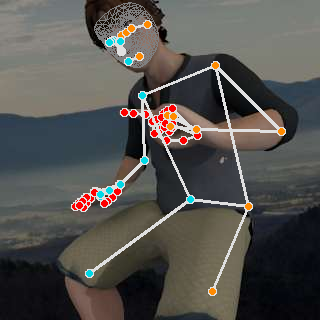

In [35]:
results = mp_holistic.Holistic().process(cv2.cvtColor(IMG, cv2.COLOR_BGR2RGB))
image_hight, image_width, _ = IMG.shape
annotated_image = IMG.copy()
mp_drawing.draw_landmarks(annotated_image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
mp_drawing.draw_landmarks(annotated_image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
mp_drawing.draw_landmarks(
    annotated_image,
    results.face_landmarks,
    mp_holistic.FACEMESH_TESSELATION,
    landmark_drawing_spec=None,
    connection_drawing_spec=mp_drawing_styles
    .get_default_face_mesh_tesselation_style())
mp_drawing.draw_landmarks(
    annotated_image,
    results.pose_landmarks,
    mp_holistic.POSE_CONNECTIONS,
    landmark_drawing_spec=mp_drawing_styles.
    get_default_pose_landmarks_style())
resize_and_show(annotated_image)